## Inverse CDF mapping

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from neurodyn import *
import numpy as np
import matplotlib.pyplot as plt, matplotlib.colors as mplcolors
import scipy.stats as stats

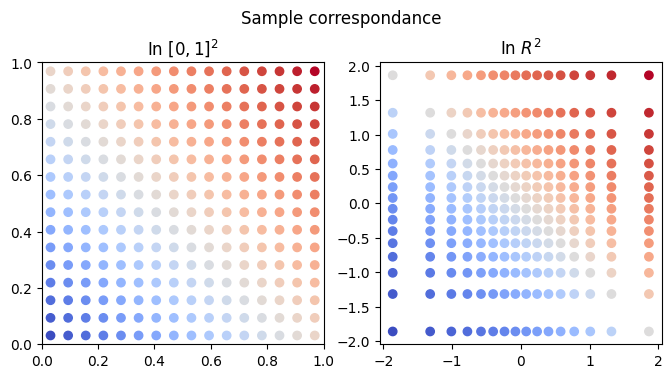

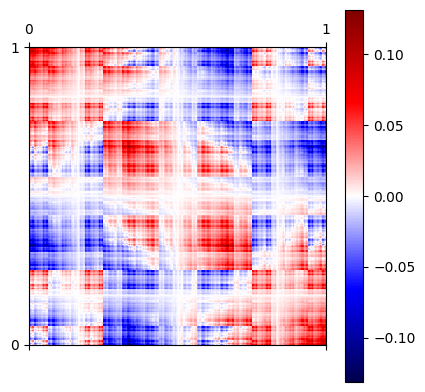

In [3]:
mapping = RecursiveLocalMapping(nrec=4)
Y = mapping.inverse_samples()
Z = stats.norm.ppf(Y)
params = LowRankRNNParams.new_mapped_valentin(phi=sigmoid, mapping_cls=RecursiveLocalMapping, nrec=4, exclude_self_connections=False, I_ext=zero)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].scatter(*Y.T, c=fake_activity(Y), cmap='coolwarm')
axes[1].scatter(*Z.T, c=fake_activity(Z), cmap='coolwarm')
axes[0].set_xlim((0,1))
axes[0].set_ylim((0,1))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[0].set_title('In $[0,1]^2$')
axes[1].set_title('In $R^2$')
fig.suptitle('Sample correspondance')
plt.show()

J = params.to_dense().J
plt.matshow(J, cmap='seismic', norm=mplcolors.TwoSlopeNorm(vcenter=0.0), extent=((0,1,0,1)));
plt.colorbar();
plt.show()

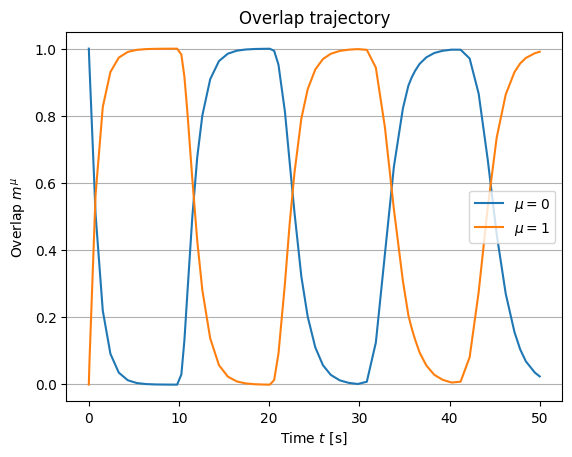

In [4]:
rnn = LowRankCyclingRNN(LowRankCyclingRNNParams.new_mapped_valentin(
	phi=sigmoid, mapping_cls=RecursiveLocalMapping, nrec=5,
	exclude_self_connections=False, I_ext=zero, delta=10, shift=1))
res = rnn.simulate(rnn.F[:, 0], t_span=(0,50), dt_max=1)
plot_overlap_trajectory(rnn, res);

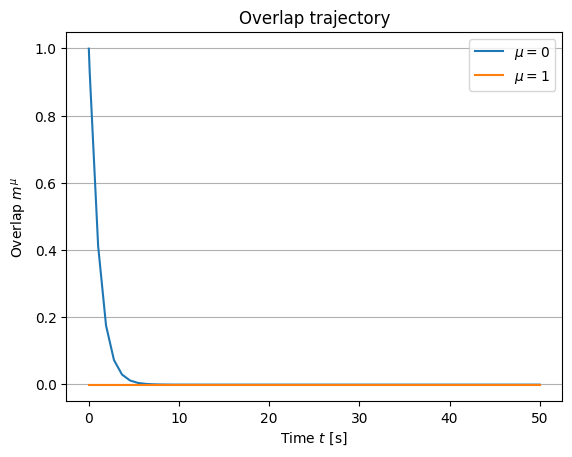

In [5]:
rnn = LowRankCyclingRNN(LowRankCyclingRNNParams.new_mapped_valentin(
	phi=sigmoid, mapping_cls=ReshapeMapping, nrec=5,
	exclude_self_connections=False, I_ext=zero, delta=10, shift=1))
res = rnn.simulate(rnn.F[:, 0], t_span=(0,50), dt_max=1)
plot_overlap_trajectory(rnn, res);

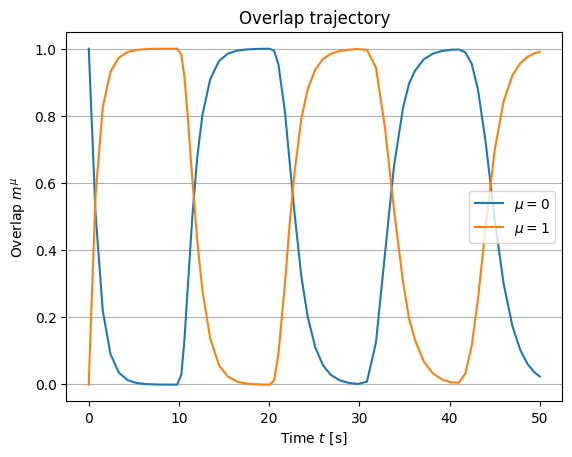

In [6]:
rnn = LowRankCyclingRNN(LowRankCyclingRNNParams.new_mapped_valentin(
	phi=sigmoid, mapping_cls=ZMapping, nrec=5,
	exclude_self_connections=False, I_ext=zero, delta=10, shift=1))
res = rnn.simulate(rnn.F[:, 0], t_span=(0,50), dt_max=1)
plot_overlap_trajectory(rnn, res);